<div style="float: right;">
  <a href="../de/data_processing.html" style="margin-left: 10px;">🇩🇪 Deutsch</a>
  <a href="../en/data_processing.html">🇬🇧 English</a>
</div>


# 5. Deskriptive Datenanalyse

## Wofür nutzen wir Python?

Im Kapitel "DaLi Thema 1: Grundlagen der Datenauswertung" wurden die wichtigsten Visualisierungsformen und Kenngrößen vorgestellt, die für eine Datenauswertung notwendig sind.

Sobald wir es mit der Verarbeitung realer (oft sehr umfangreicher) Datensätze zu tun haben, kann Software helfen, bestimmte Kenngrößen und Visualisierungsformen zu erstellen. Dieses DaLi-Thema beschäftigt sich daher mit der Analyse und Visualisierung solcher Datensätze mittels Software (Python oder R).

Um einen ersten Eindruck davon zu bekommen, wie wir Python in diesem Zusammenhang nutzen können, verwenden wir den aus "DaLi Thema 1: Grundlagen der Datenanalyse" bekannten Datensatz "Tips".

## Kurzbeschreibung des Datensatzes "Tips"

Ein Kellner hat über einen Zeitraum von mehreren Monaten Informationen zu jedem Trinkgeld, das er in einem Restaurant erhalten hat, aufgezeichnet. Dabei wurden mehrere Variablen erfasst:

* Rechnungssumme in Dollar (`total_bill`)
* Trinkgeld in Dollar (`tip`)
* Geschlecht der zahlenden Person (`sex`)
* Raucher unter den Gästen (`smoker`)
* Wochentag (`day`)
* Tageszeit (`time`)
* Gruppengröße (`size`)

Im Folgenden erklären wir kurz, was der jeweilige Code bewirkt, bevor der Code und die entsprechenden Ausgaben dargestellt werden.

## Erste Informationen über einen Datensatz erhalten

Die folgenden zwei Funktionen sind in Python über die pandas-Bibliothek integriert. Sie eignen sich gut, um einen ersten Überblick über einen Datensatz und die Eigenschaften seiner Merkmale zu erhalten:

* `info()` liefert Details zur Datenstruktur, wie Spaltennamen, Datentypen und Anzahl der nicht-fehlenden Werte.
* `describe(include='all')` gibt zusammenfassende Statistiken für jede Spalte aus — inklusive Minimum, Maximum, Mittelwert, Quartilen usw. Bei `include='all'` werden auch kategoriale Variablen eingeschlossen.

Diese Funktionen sind ideal, um schnell potenzielle Probleme (z. B. fehlende Werte oder falsche Datentypen) zu erkennen und ein grundlegendes Gefühl für die Verteilung der Daten zu bekommen.

In [1]:
import pandas as pd
tips = pd.read_csv("tips.csv")

# Informationen über Struktur und Merkmale
tips.info()
tips.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


Ähnliche Informationen erhält man auch mit der Funktion `skim()` aus der Bibliothek `skimpy`:

In [2]:
from skimpy import skim
import pandas as pd
tips = pd.read_csv("tips.csv")

# Detaillierte Übersicht über den Datensatz
skim(tips)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 244    │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column         ┃ NA  ┃ NA %   ┃ mean    ┃ sd       ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ total_bill     │   0 │      0 │   19.79 │    8.902 │   3.07 │   13.35 │   17.8 │  24.13 │  50.81 │ ▂▇▅▂▁▁  │  │
│ │ tip            │   0 │      0 │   2.998 │    1.384 │      1 │       2 │    2.9 │  3.562 │     10 │  ▇▇▃▁   │  │
│ │ size           │   0 │      0 │    2.57 │   0.9511 │      1 │       2 │      2 │      3 │      6 │   ▇▂▂   │  │
│ └────────────────┴─────┴────────┴─────────┴──────────┴────────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓  │
│ ┃ column  ┃ NA  ┃ NA %  ┃ shortest  ┃ longest ┃ min    ┃ max   ┃ chars per row ┃ words per row ┃ total words ┃  │
│ ┡━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩  │
│ │ sex     │   0 │     0 │ Male      │ Female  │ Female │ Male  │          4.71 │             1 │         244 │  │
│ │ smoker  │   0 │     0 │ No        │ Yes     │ No     │ Yes   │          2.38 │             1 │         244 │  │
│ │ day     │   0 │     0 │ Sun       │ Thur    │ Fri    │ Thur  │          3.25 │             1 │         244 │  │
│ │ time    │   0 │     0 │ Lunch     │ Dinner  │ Dinner │ Lunch │          5.72 │             1 │         244 │  │
│ └─────────┴─────┴───────┴───────────┴─────────┴────────┴───────┴───────────────┴───────────────┴─────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### Übung 1
```{raw} html
<style>
  :root {
    --accent: #4f46e5;
    --accent-light: #eef2ff;
    --bg: #ffffff;
    --border: #e5e7eb;
    --text: #111827;
    --gray: #6b7280;
    --success: #16a34a;
    --error: #dc2626;
    --warning: #facc15;
  }

  /* Quiz 1 Container */
  #quiz1-container {
    background: var(--bg);
    border: 1px solid var(--border);
    border-radius: 16px;
    padding: 2rem;
    max-width: 750px;
    font-family: "Segoe UI", Roboto, sans-serif;
    color: var(--text);
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.05);
    transition: box-shadow 0.3s ease;
    margin-bottom: 2rem;
  }
  #quiz1-container:hover {
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.08);
  }

  #quiz1-container p.question {
    font-size: 1.25rem;
    font-weight: 600;
    margin-bottom: 1.5rem;
  }

  /* Flex labels for Quiz 1 */
  #quiz1-form label {
    display: flex;
    align-items: center;
    gap: 0.75rem;
    margin: 0.75rem 0;
    padding: 0.75rem 1rem;
    border-radius: 12px;
    border: 1px solid transparent;
    background-color: var(--accent-light);
    cursor: pointer;
    transition: all 0.25s ease;
  }
  #quiz1-form label:hover {
    background-color: #e0e7ff;
    border-color: var(--accent);
  }

  #quiz1-form input[type="radio"] {
    transform: scale(1.2);
    accent-color: var(--accent);
  }

  #quiz1-form pre {
    margin: 0;
    background-color: transparent !important;
    border: none !important;
    display: inline;
    font-size: 0.95rem;
    white-space: pre-wrap;
    padding: 0;
    font-family: 'Courier New', Courier, monospace;
  }

  #quiz1-form button {
    margin-top: 1.5rem;
    background-color: var(--accent);
    color: white;
    padding: 0.6rem 1.2rem;
    border: none;
    border-radius: 8px;
    font-size: 1rem;
    font-weight: 600;
    cursor: pointer;
    transition: background-color 0.3s ease;
  }
  #quiz1-form button:hover {
    background-color: #4338ca;
  }

  #quiz1-feedback {
    margin-top: 1.25rem;
    padding: 0.75rem 1rem;
    border-radius: 8px;
    font-weight: 500;
    font-size: 1rem;
    display: inline-block;
  }
  .success {
    background-color: #dcfce7;
    color: var(--success);
    border: 1px solid var(--success);
  }
  .error {
    background-color: #fee2e2;
    color: var(--error);
    border: 1px solid var(--error);
  }
  .warning {
    background-color: #fef9c3;
    color: var(--warning);
    border: 1px solid var(--warning);
  }
</style>

<div id="quiz1-container">
  <p class="question">🧠 Wie hoch war das höchste, vom Kellner dokumentierte Trinkgeld (in Dollar)?</p>
  <form id="quiz1-form">
    <label>
      <input type="radio" name="answer1" value="a">
      <pre><code>$6</code></pre>
    </label>
    <label>
      <input type="radio" name="answer1" value="b">
      <pre><code>$10</code></pre>
    </label>
    <label>
      <input type="radio" name="answer1" value="c">
      <pre><code>$12</code></pre>
    </label>
    <label>
      <input type="radio" name="answer1" value="d">
      <pre><code>$20</code></pre>
    </label>

    <button type="button" onclick="checkAnswer1()">Submit Answer</button>
    <p id="quiz1-feedback"></p>
  </form>
</div>

<script>
  function checkAnswer1() {
    const answers1 = {
      a: { correct: false, feedback: "❌ Das höchste Tinkgeld war höher als 6 Dollar." },
      b: { correct: true,  feedback: "✅ Korrekt!" },
      c: { correct: false, feedback: "❌ Inkorrekt, es waren nicht 12 Dollar." },
      d: { correct: false, feedback: "❌ Nicht ganz, es waren weniger als 20 Dollar." }
    };

    const selected = document.querySelector('input[name="answer1"]:checked');
    const feedback = document.getElementById("quiz1-feedback");

    if (!selected) {
      feedback.textContent = "⚠️ Bitte wähle eine Antwort aus.";
      feedback.className = "warning";
      return;
    }

    const result = answers1[selected.value];
    feedback.textContent = result.feedback;
    feedback.className = result.correct ? "success" : "error";
  }
</script>
```

## Balkendiagramm erstellen

Unten siehst du eine Variante zur Erstellung eines Balkendiagramms. Die Funktion bar() aus der matplotlib-Bibliothek wird verwendet, um die Häufigkeiten der Kategorien „Female“ und „Male“ in der Spalte „sex“ des Datensatzes darzustellen.

Zunächst wird die Pandas-Bibliothek verwendet, um den Datensatz tips.csv zu laden. Anschließend wird die Funktion value_counts() auf die Spalte „sex“ angewendet, um die absolute Häufigkeit jedes Geschlechts zu bestimmen. Diese Zählwerte werden in der Variablen sex_counts gespeichert; die zugehörigen Kategorienamen und Werte werden extrahiert.

Schließlich wird ein einfaches vertikales Balkendiagramm mit plt.bar() erstellt. Das Diagramm enthält einen Titel sowie Achsenbeschriftungen, um die dargestellten Informationen besser interpretieren zu können.

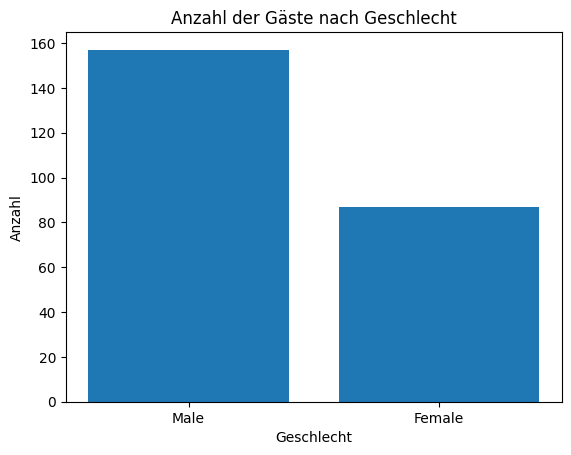

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

sex_counts = tips["sex"].value_counts()
labels = sex_counts.index
values = sex_counts.values

plt.bar(labels, values)

plt.title("Anzahl der Gäste nach Geschlecht")
plt.xlabel("Geschlecht")
plt.ylabel("Anzahl")
plt.show()

Wir können mithilfe der .value_counts() Funktion auch relative Häufigkeiten bestimmen. Dafür müssen wir den Parameter normalize=True übergeben.

In [4]:
tips['sex'].value_counts(normalize=True)

sex
Male      0.643443
Female    0.356557
Name: proportion, dtype: float64

Wir können uns auch Kontingenztabellen mithilfe der .crosstab() Funktion erstellen lassen:

In [5]:
# Absolute Häufigkeiten
print(pd.crosstab(tips['sex'], tips['time']))

# Alternativ für relative Häufigkeiten:
print(pd.crosstab(tips['sex'], tips['time'], normalize='all'))

time    Dinner  Lunch
sex                  
Female      52     35
Male       124     33
time      Dinner     Lunch
sex                       
Female  0.213115  0.143443
Male    0.508197  0.135246


## Gruppiertes Balkendiagramm

Der folgende Code erstellt ein gruppiertes Balkendiagramm, das die Anzahl der Gäste nach Geschlecht zeigt, getrennt nach Tageszeit (Lunch vs. Dinner). Dies wird mit der catplot()-Funktion von Seaborn umgesetzt, die es ermöglicht, mehrere Diagramme basierend auf den Werten einer kategorialen Variable zu erstellen.

Das Argument col="time" gibt an, dass für jeden Wert in der Spalte „time“ ein eigenes Diagramm erstellt werden soll. Das Ergebnis sind zwei nebeneinander angeordnete Balkendiagramme, die die Geschlechterverteilung für Mittag- und Abendessen separat darstellen.

Diese Visualisierung eignet sich gut, um zu vergleichen, wie sich die Geschlechterverteilung der Gäste zwischen den beiden Tageszeiten unterscheidet.

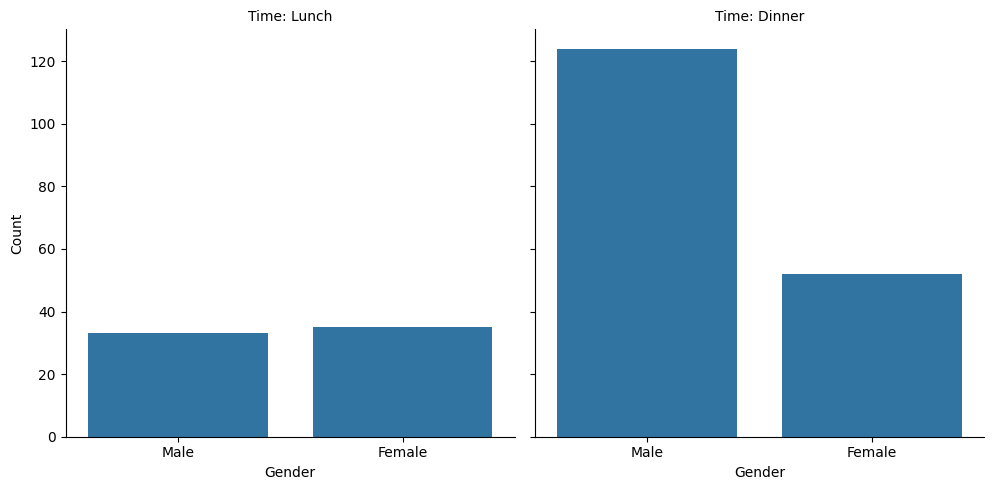

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tips = pd.read_csv("tips.csv")
tips = sns.load_dataset("tips")

g = sns.catplot(
    data=tips,
    x="sex",
    kind="count",
    col="time",
)

g.set_titles("Time: {col_name}")
g.set_axis_labels("Gender", "Count")
plt.show()

#### Übung 2

```{raw} html
<style>
  :root {
    --accent: #4f46e5;
    --accent-light: #eef2ff;
    --bg: #ffffff;
    --border: #e5e7eb;
    --text: #111827;
    --gray: #6b7280;
    --success: #16a34a;
    --error: #dc2626;
    --warning: #facc15;
  }

  /* Quiz 2 Container */
  #quiz2-container {
    background: var(--bg);
    border: 1px solid var(--border);
    border-radius: 16px;
    padding: 2rem;
    max-width: 750px;
    font-family: "Segoe UI", Roboto, sans-serif;
    color: var(--text);
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.05);
    transition: box-shadow 0.3s ease;
    margin-bottom: 2rem;
  }
  #quiz2-container:hover {
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.08);
  }

  #quiz2-container p.question {
    font-size: 1.25rem;
    font-weight: 600;
    margin-bottom: 1.5rem;
  }

  /* Flex labels for Quiz 2 */
  #quiz2-form label {
    display: flex;
    align-items: center;
    gap: 0.75rem;
    margin: 0.75rem 0;
    padding: 0.75rem 1rem;
    border-radius: 12px;
    border: 1px solid transparent;
    background-color: var(--accent-light);
    cursor: pointer;
    transition: all 0.25s ease;
  }
  #quiz2-form label:hover {
    background-color: #e0e7ff;
    border-color: var(--accent);
  }

  #quiz2-form input[type="radio"] {
    transform: scale(1.2);
    accent-color: var(--accent);
  }

  #quiz2-form pre {
    margin: 0;
    background-color: transparent !important;
    border: none !important;
    display: inline;
    font-size: 0.95rem;
    white-space: pre-wrap;
    padding: 0;
    font-family: 'Courier New', Courier, monospace;
  }

  #quiz2-form button {
    margin-top: 1.5rem;
    background-color: var(--accent);
    color: white;
    padding: 0.6rem 1.2rem;
    border: none;
    border-radius: 8px;
    font-size: 1rem;
    font-weight: 600;
    cursor: pointer;
    transition: background-color 0.3s ease;
  }
  #quiz2-form button:hover {
    background-color: #4338ca;
  }

  #quiz2-feedback {
    margin-top: 1.25rem;
    padding: 0.75rem 1rem;
    border-radius: 8px;
    font-weight: 500;
    font-size: 1rem;
    display: inline-block;
  }

  .success {
    background-color: #dcfce7;
    color: var(--success);
    border: 1px solid var(--success);
  }
  .error {
    background-color: #fee2e2;
    color: var(--error);
    border: 1px solid var(--error);
  }
  .warning {
    background-color: #fef9c3;
    color: var(--warning);
    border: 1px solid var(--warning);
  }
</style>

<div id="quiz2-container">
  <p class="question">🧠 Beim Mittagessen war die Anzahl weiblicher und männlicher Gäste, die bezahlt haben, ungefähr gleich, aber beim Abendessen haben männliche Gäste deutlich häufiger bezahlt (mehr als doppelt so oft). Wahr oder falsch?</p>
  <form id="quiz2-form">
    <label>
      <input type="radio" name="answer2" value="a">
      <pre><code>Wahr</code></pre>
    </label>
    <label>
      <input type="radio" name="answer2" value="b">
      <pre><code>Falsch</code></pre>
    </label>
    <label>
      <input type="radio" name="answer2" value="c">
      <pre><code>Geht aus den Daten nicht hervor</code></pre>
    </label>

    <button type="button" onclick="checkAnswer2()">Submit Answer</button>
    <p id="quiz2-feedback"></p>
  </form>
</div>

<script>
  function checkAnswer2() {
    const answers2 = {
      a: { correct: true,  feedback: "✅ Korrekt!" },
      b: { correct: false, feedback: "❌ Inkorrekt." },
      c: { correct: false, feedback: "❌ Inkorrekt, die Daten geben uns alle nötigen Informationen." }
    };

    const selected = document.querySelector('input[name="answer2"]:checked');
    const feedback = document.getElementById("quiz2-feedback");

    if (!selected) {
      feedback.textContent = "⚠️ Bitte wähle eine Antwort aus.";
      feedback.className = "warning";
      return;
    }

    const result = answers2[selected.value];
    feedback.textContent = result.feedback;
    feedback.className = result.correct ? "success" : "error";
  }
</script>
```

## Histogramm erstellen

Der folgende Code erstellt ein Histogramm, das die Häufigkeitsverteilung der Rechnungsbeträge im Datensatz visualisiert.
Die Funktion plt.hist() aus der Matplotlib-Bibliothek wird verwendet, um darzustellen, wie oft Rechnungsbeträge in bestimmten Wertebereichen auftreten.

edgecolor="black" fügt jedem Balken klare Umrandungen hinzu.

Die x-Achse zeigt die Rechnungsbeträge in Dollar, während die y-Achse die Anzahl der Rechnungen in jedem Intervall angibt.

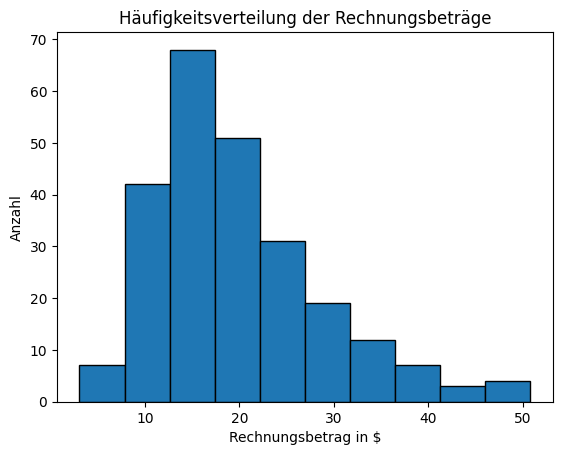

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

plt.hist(
    tips["total_bill"],
    edgecolor="black"
)
plt.title("Häufigkeitsverteilung der Rechnungsbeträge")
plt.xlabel("Rechnungsbetrag in $")
plt.ylabel("Anzahl")
plt.show()

## Streudiagramm erstellen

Der folgende Code erstellt ein Streudiagramm, um die Beziehung zwischen dem Gesamtbetrag der Rechnung und der Trinkgeldhöhe zu visualisieren.
Die Funktion plt.scatter() aus der Matplotlib-Bibliothek wird verwendet, um jede Beobachtung als Punkt zu zeichnen, wobei:
- die x-Achse den Gesamtbetrag der Rechnung in Dollar darstellt
- die y-Achse den entsprechenden Trinkgeldbetrag zeigt
Jeder Punkt im Diagramm entspricht einer Zeile im Datensatz. Diese Art der Visualisierung ist nützlich, um Muster oder Trends zu erkennen – beispielsweise, ob höhere Rechnungen mit höheren Trinkgeldern verbunden sind.

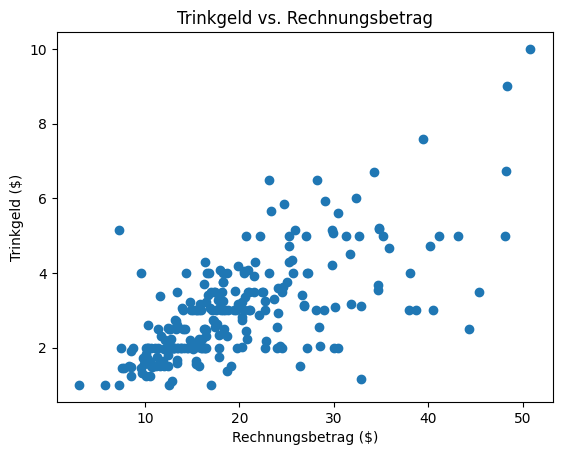

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

plt.scatter(
    tips["total_bill"],
    tips["tip"]
)

plt.title("Trinkgeld vs. Rechnungsbetrag")
plt.xlabel("Rechnungsbetrag ($)")
plt.ylabel("Trinkgeld ($)")
plt.show()

### Übung 3
```{raw} html
<style>
  :root {
    --accent: #4f46e5;
    --accent-light: #eef2ff;
    --bg: #ffffff;
    --border: #e5e7eb;
    --text: #111827;
    --gray: #6b7280;
    --success: #16a34a;
    --error: #dc2626;
    --warning: #facc15;
  }

  /* Quiz 3 Container */
  #quiz3-container {
    background: var(--bg);
    border: 1px solid var(--border);
    border-radius: 16px;
    padding: 2rem;
    max-width: 750px;
    font-family: "Segoe UI", Roboto, sans-serif;
    color: var(--text);
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.05);
    transition: box-shadow 0.3s ease;
    margin-bottom: 2rem;
  }
  #quiz3-container:hover {
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.08);
  }

  #quiz3-container p.question {
    font-size: 1.25rem;
    font-weight: 600;
    margin-bottom: 1.5rem;
  }

  /* Flex labels for Quiz 3 */
  #quiz3-form label {
    display: flex;
    align-items: center;
    gap: 0.75rem;
    margin: 0.75rem 0;
    padding: 0.75rem 1rem;
    border-radius: 12px;
    border: 1px solid transparent;
    background-color: var(--accent-light);
    cursor: pointer;
    transition: all 0.25s ease;
  }
  #quiz3-form label:hover {
    background-color: #e0e7ff;
    border-color: var(--accent);
  }

  #quiz3-form input[type="radio"] {
    transform: scale(1.2);
    accent-color: var(--accent);
  }

  #quiz3-form pre {
    margin: 0;
    background-color: transparent !important;
    border: none !important;
    display: inline;
    font-size: 0.95rem;
    white-space: pre-wrap;
    padding: 0;
    font-family: 'Courier New', Courier, monospace;
  }

  #quiz3-form button {
    margin-top: 1.5rem;
    background-color: var(--accent);
    color: white;
    padding: 0.6rem 1.2rem;
    border: none;
    border-radius: 8px;
    font-size: 1rem;
    font-weight: 600;
    cursor: pointer;
    transition: background-color 0.3s ease;
  }
  #quiz3-form button:hover {
    background-color: #4338ca;
  }

  #quiz3-feedback {
    margin-top: 1.25rem;
    padding: 0.75rem 1rem;
    border-radius: 8px;
    font-weight: 500;
    font-size: 1rem;
    display: inline-block;
  }

  .success {
    background-color: #dcfce7;
    color: var(--success);
    border: 1px solid var(--success);
  }
  .error {
    background-color: #fee2e2;
    color: var(--error);
    border: 1px solid var(--error);
  }
  .warning {
    background-color: #fef9c3;
    color: var(--warning);
    border: 1px solid var(--warning);
  }
</style>

<div id="quiz3-container">
  <p class="question">🧠 Wie hoch war das Trinkgeld bei einer Rechnung von ungefähr 48 $? (Eine ungefähre Schätzung reicht aus)</p>
  <form id="quiz3-form">
    <label>
      <input type="radio" name="answer3" value="a">
      <pre><code>$11</code></pre>
    </label>
    <label>
      <input type="radio" name="answer3" value="b">
      <pre><code>$3, $5, und $8</code></pre>
    </label>
    <label>
      <input type="radio" name="answer3" value="c">
      <pre><code>$5, $7, und $9</code></pre>
    </label>
    <label>
      <input type="radio" name="answer3" value="d">
      <pre><code>Keine der genannten Antworten</code></pre>
    </label>

    <button type="button" onclick="checkAnswer3()">Submit Answer</button>
    <p id="quiz3-feedback"></p>
  </form>
</div>

<script>
  function checkAnswer3() {
    const answers3 = {
      a: { correct: false, feedback: "❌ Nicht korrekt. Die Trinkgelder waren niedriger." },
      b: { correct: false, feedback: "❌ Inkorrekt. $3, $5, und $8 waren nicht die Einzigen." },
      c: { correct: true,  feedback: "✅ Korrekt!" },
      d: { correct: false, feedback: "❌ Inkorrekt, es gibt eine korrekte Antwort." }
    };

    const selected = document.querySelector('input[name="answer3"]:checked');
    const feedback = document.getElementById("quiz3-feedback");

    if (!selected) {
      feedback.textContent = "⚠️ Bitte wähle eine Antwort aus.";
      feedback.className = "warning";
      return;
    }

    const result = answers3[selected.value];
    feedback.textContent = result.feedback;
    feedback.className = result.correct ? "success" : "error";
  }
</script>
```

## Streudiagramm mit Regressionslinie erstellen

Der folgende Code erstellt ein Streudiagramm, das die Beziehung zwischen der Gesamtrechnung und dem Trinkgeldbetrag zeigt.
Zusätzlich zu den einzelnen Datenpunkten wird eine Regressionslinie hinzugefügt, die die lineare Beziehung zwischen
den beiden Variablen modelliert.

Dies wird mit der Funktion lmplot() aus der Seaborn-Bibliothek gemacht.
- Der Parameter x="total_bill" definiert die Variable auf der x-Achse,
- y="tip" definiert die Variable auf der y-Achse,
- und lmplot aus seaborn passt automatisch eine lineare Regressionslinie mit der Kleinste-Quadrate-Methode an und zeichnet sie durch die Daten.

````{margin}
```{note}
Hier zeichnet Python automatisch zur Regressionsgeraden in hellblau den "Sicherheitsbereich" ein. Dieser weist darauf hin, dass die Gerade nur eine Schätzung ist und der Zusammenhang zwischen den Merkmalen auch anders aussehen könnte. Insbesondere an den Rändern - also bei sehr kleinen und sehr großen Gesamtrechnungen - ist dieser Bereich daher auch größer, denn hier gibt es weniger Daten, das führt zu mehr Schätzunsicherheit.
```
````

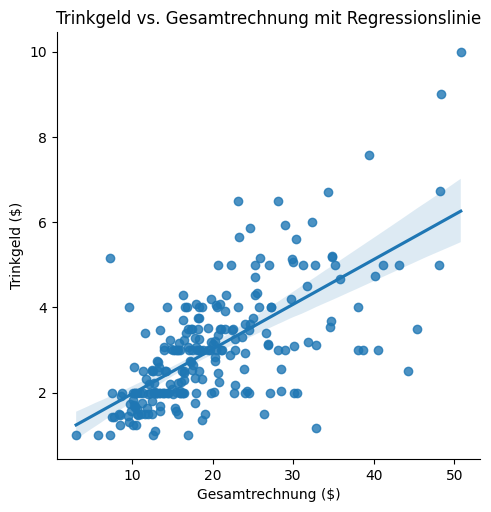

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

sns.lmplot(
    data=tips,
    x="total_bill",
    y="tip"
)

plt.title("Trinkgeld vs. Gesamtrechnung mit Regressionslinie")
plt.xlabel("Gesamtrechnung ($)")
plt.ylabel("Trinkgeld ($)")
plt.show()

### Korrelationen berechnen

Der folgende Code berechnet die Korrelation zwischen der Gesamtrechnung und dem Trinkgeldbetrag. Wir betrachten zwei verschieden Möglichkeiten, Korrelationen zu messen: die Pearson-Korrelation und die Spearman-Korrelation.

Dies geschieht mithilfe der Funktionen pearsonr() und spearmanr() aus dem scipy.stats-Modul. Beide nehmen die jeweiligen Spalten unseres pandas-Datensatzes als Eingabevarbiablen und berechnen die entsprechende Korrelation und auch den p-Wert, der angibt, ob es sich um eine signifikante Korrelation handelt.

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# Load data
tips = pd.read_csv("tips.csv")

# Pearson correlation
pearson_corr, pearson_p = pearsonr(tips["total_bill"], tips["tip"])
print("Pearson correlation:", pearson_corr)
print("P-value (Pearson):", pearson_p)

# Spearman correlation
spearman_corr, spearman_p = spearmanr(tips["total_bill"], tips["tip"])
print("Spearman correlation:", spearman_corr)
print("P-value (Spearman):", spearman_p)

Pearson correlation: 0.6757341092113647
P-value (Pearson): 6.692470646863343e-34
Spearman correlation: 0.6789681219001009
P-value (Spearman): 2.501158440923619e-34


## Mosaikdiagramm erstellen

Der folgende Code erstellt ein Mosaikdiagramm, um die Beziehung zwischen den kategorialen Variablen Geschlecht (sex)
und Tageszeit (time) im Datensatz zu visualisieren.

Ein Mosaikdiagramm zeigt die relativen Häufigkeiten von Kombinationen kategorialer Werte durch Rechtecke, deren Flächen
proportional zur Anzahl der Beobachtungen sind. In diesem Beispiel:

Die x-Achse ist aufgeteilt nach den Werten von sex (weiblich / männlich),
und jeder Abschnitt ist weiter unterteilt nach time (Mittagessen / Abendessen).
So kann man leicht erkennen, ob zum Beispiel ein höherer Anteil von Männern oder Frauen zu einer bestimmten Tageszeit
das Restaurant besucht hat.

Das Diagramm wird mit der Funktion mosaic() aus der Bibliothek statsmodels erstellt, die speziell für diese
Art der kategorialen Visualisierung gedacht ist.

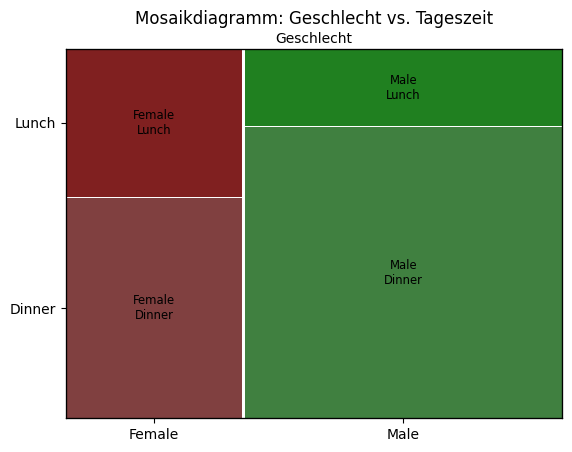

In [11]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

mosaic(tips, ['sex', 'time'])

plt.title("Mosaikdiagramm: Geschlecht vs. Tageszeit")
plt.xlabel("Geschlecht")
plt.ylabel("Anteil")
plt.show()

## Boxplot erstellen

Dieser Code verwendet die Funktion boxplot() aus der seaborn-Bibliothek (importiert als sns), um ein Box-and-Whisker-Diagramm
zu erstellen, das die Verteilung der Gesamtrechnungen für die beiden Zeitkategorien Mittagessen und Abendessen vergleicht.

Jede Box repräsentiert die Streuung der Daten für eine Gruppe und enthält:
- den Median (horizontale Linie innerhalb der Box),
- die Interquartilsdifferenz (die Box selbst),
- und mögliche Ausreißer (einzelne Punkte).

Die x-Achse zeigt die beiden Zeitkategorien (time), während die y-Achse die entsprechenden Rechnungsbeträge (total_bill)
anzeigt.
Diese Visualisierung erleichtert den Vergleich, ob die Rechnungen abends tendenziell höher sind als mittags.

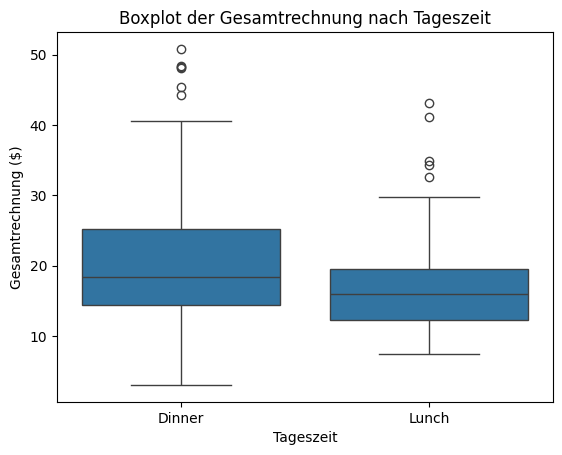

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tips = pd.read_csv("tips.csv")

sns.boxplot(
    data=tips,
    x="time",
    y="total_bill",
)

plt.title("Boxplot der Gesamtrechnung nach Tageszeit")
plt.xlabel("Tageszeit")
plt.ylabel("Gesamtrechnung ($)")
plt.show()

## Verteilungsfunktion bestimmen

Dieser Code verwendet die Klasse ECDF aus dem Modul statsmodels.distributions.empirical_distribution, um die
empirische Verteilungsfunktion der Werte von total_bill zu berechnen.

Eine ECDF zeigt für jeden Wert auf der x-Achse den Anteil der Beobachtungen, die kleiner oder gleich diesem Wert sind.
Das Ergebnis ist eine treppenförmige Kurve, die von 0 bis 1 ansteigt.
Diese Art von Diagramm ist nützlich, um zu verstehen, wie Werte im Datensatz verteilt sind – zum Beispiel, um abzuschätzen,
welcher Anteil der Rechnungen unter einem bestimmten Betrag liegt.

Die Funktion plt.step() wird verwendet, um die ECDF als Stufenfunktion zu zeichnen, und Rasterlinien werden hinzugefügt,
um die Lesbarkeit zu verbessern.

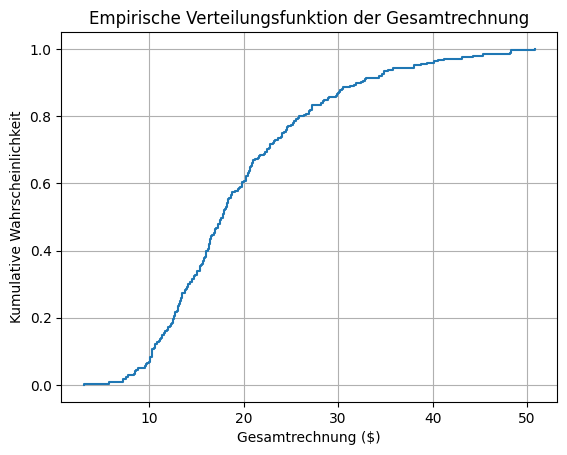

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
tips = pd.read_csv("tips.csv")

ecdf = ECDF(tips["total_bill"])

plt.step(ecdf.x, ecdf.y, where="post")
plt.title("Empirische Verteilungsfunktion der Gesamtrechnung")
plt.xlabel("Gesamtrechnung ($)")
plt.ylabel("Kumulative Wahrscheinlichkeit")
plt.grid(True)
plt.show()

### Übung 4
```{raw} html
<style>
  :root {
    --accent: #4f46e5;
    --accent-light: #eef2ff;
    --bg: #ffffff;
    --border: #e5e7eb;
    --text: #111827;
    --gray: #6b7280;
    --success: #16a34a;
    --error: #dc2626;
    --warning: #facc15;
  }

  /* Quiz 4 Container */
  #quiz4-container {
    background: var(--bg);
    border: 1px solid var(--border);
    border-radius: 16px;
    padding: 2rem;
    max-width: 750px;
    font-family: "Segoe UI", Roboto, sans-serif;
    color: var(--text);
    box-shadow: 0 8px 24px rgba(0, 0, 0, 0.05);
    transition: box-shadow 0.3s ease;
    margin-bottom: 2rem;
  }
  #quiz4-container:hover {
    box-shadow: 0 10px 30px rgba(0, 0, 0, 0.08);
  }

  #quiz4-container p.question {
    font-size: 1.25rem;
    font-weight: 600;
    margin-bottom: 1.5rem;
  }

  /* Flex labels for Quiz 4 */
  #quiz4-form label {
    display: flex;
    align-items: center;
    gap: 0.75rem;
    margin: 0.75rem 0;
    padding: 0.75rem 1rem;
    border-radius: 12px;
    border: 1px solid transparent;
    background-color: var(--accent-light);
    cursor: pointer;
    transition: all 0.25s ease;
  }
  #quiz4-form label:hover {
    background-color: #e0e7ff;
    border-color: var(--accent);
  }

  #quiz4-form input[type="radio"] {
    transform: scale(1.2);
    accent-color: var(--accent);
  }

  #quiz4-form pre {
    margin: 0;
    background-color: transparent !important;
    border: none !important;
    display: inline;
    font-size: 0.95rem;
    white-space: pre-wrap;
    padding: 0;
    font-family: 'Courier New', Courier, monospace;
  }

  #quiz4-form button {
    margin-top: 1.5rem;
    background-color: var(--accent);
    color: white;
    padding: 0.6rem 1.2rem;
    border: none;
    border-radius: 8px;
    font-size: 1rem;
    font-weight: 600;
    cursor: pointer;
    transition: background-color 0.3s ease;
  }
  #quiz4-form button:hover {
    background-color: #4338ca;
  }

  #quiz4-feedback {
    margin-top: 1.25rem;
    padding: 0.75rem 1rem;
    border-radius: 8px;
    font-weight: 500;
    font-size: 1rem;
    display: inline-block;
  }

  .success {
    background-color: #dcfce7;
    color: var(--success);
    border: 1px solid var(--success);
  }
  .error {
    background-color: #fee2e2;
    color: var(--error);
    border: 1px solid var(--error);
  }
  .warning {
    background-color: #fef9c3;
    color: var(--warning);
    border: 1px solid var(--warning);
  }
</style>

<div id="quiz4-container">
  <p class="question">🧠 Wieviel Prozent der Rechnungen lagen unter $20?</p>
  <form id="quiz4-form">
    <label>
      <input type="radio" name="answer4" value="a">
      <pre><code>30%</code></pre>
    </label>
    <label>
      <input type="radio" name="answer4" value="b">
      <pre><code>45%</code></pre>
    </label>
    <label>
      <input type="radio" name="answer4" value="c">
      <pre><code>55%</code></pre>
    </label>
    <label>
      <input type="radio" name="answer4" value="d">
      <pre><code>60%</code></pre>
    </label>

    <button type="button" onclick="checkAnswer4()">Submit Answer</button>
    <p id="quiz4-feedback"></p>
  </form>
</div>

<script>
  function checkAnswer4() {
    const answers4 = {
      a: { correct: false, feedback: "❌ Nicht ganz, 30% sind zu wenig." },
      b: { correct: false, feedback: "❌ Inkorrekt." },
      c: { correct: false, feedback: "❌ Leider nicht richtig." },
      d: { correct: true,  feedback: "✅ Korrekt." }
    };

    const selected = document.querySelector('input[name="answer4"]:checked');
    const feedback = document.getElementById("quiz4-feedback");

    if (!selected) {
      feedback.textContent = "⚠️ Bitte wähle eine Antwort aus.";
      feedback.className = "warning";
      return;
    }

    const result = answers4[selected.value];
    feedback.textContent = result.feedback;
    feedback.className = result.correct ? "success" : "error";
  }
</script>
```